# Homework 

During the exercise you will be using the data from the 1987 National Indonesia Contraceptive Prevalence Survey. The detailed description of the dataset can be found at [UCI ML Repository website](https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice). Read the raw data from the following URL: [https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data](https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data)

Your tasks are as follows:

- Identify the format of the raw data and read it into a dataframe correctly. Remember to provide a list of meaningful attribute names
- Normalize the `Age` attribute
- Remove the column containing the information about religion
- Create a second dataframe containig only women with highest degree of education
- Recode the `Wife working now` attribute, changing 0 to 'no' and 1 to 'yes'
- Compute the frequency of contraceptive methods grouping by the woman's education level
- Create a new column which will contain the average degree of education between a wife and a husband
- Create a new binary column which will indicate if a given woman has given birth to more than the average number of children
- Change `Standard of living` column into an ordered category
- Recode `Wife's education` attribute into a set of binary attributes using dummy variables
- Plot the histogram of the number of children
- Plot the bar chart of the standard of living

Save your notebook as *firstname.lastname.ipynb* and upload it to [the shared folder](https://drive.google.com/drive/folders/1ndFqSdZ7evS5KdplDsZN7vr7xfMA_Aw_?usp=sharing). The deadline for submitting your solutions is **Sunday, March 31, 21:00**. For this assignement you can get the maximum of **10 pts**.


In [1]:
import pandas as pd

In [2]:
address = "https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data"
data = pd.read_csv(address, header=None)

data.columns = ['wife_age', 'wife_edu', 'husband_edu', 'num_children', 'wife_religion', 'wife_working', 'husband_occupation', 'standard_of_living_index', 'media_exposure', 'contraceptive_method']
data.drop('wife_religion', axis=1)
data

,wife_age,wife_edu,husband_edu,num_children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [3]:
data.wife_age = (data['wife_age'] - data['wife_age'].min()) / (data['wife_age'].max() - data['wife_age'].min())
data

,wife_age,wife_edu,husband_edu,num_children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method
0,0.242424,2,3,3,1,1,2,3,0,1
1,0.878788,1,3,10,1,1,3,4,0,1
2,0.818182,2,3,7,1,1,3,4,0,1
3,0.787879,3,2,9,1,1,3,3,0,1
4,0.606061,3,3,8,1,1,3,2,0,1


In [4]:
women_highest = data[data.wife_edu == data.wife_edu.max()]
women_highest = women_highest.copy()
women_highest

,wife_age,wife_edu,husband_edu,num_children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method
5,0.090909,4,4,0,1,1,3,3,0,1
12,0.848485,4,4,1,1,0,1,4,0,1
22,0.909091,4,4,1,0,1,1,4,0,1
23,0.696970,4,4,1,1,1,1,4,0,1
24,0.969697,4,4,5,1,1,1,4,0,1


In [5]:
data.wife_working = data.wife_working.apply(lambda x: 'yes' if x == 1 else 'no')
data

,wife_age,wife_edu,husband_edu,num_children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method
0,0.242424,2,3,3,1,yes,2,3,0,1
1,0.878788,1,3,10,1,yes,3,4,0,1
2,0.818182,2,3,7,1,yes,3,4,0,1
3,0.787879,3,2,9,1,yes,3,3,0,1
4,0.606061,3,3,8,1,yes,3,2,0,1


In [6]:
temp = data.groupby([data.wife_edu, data.contraceptive_method]).size().reset_index(name='count')
counts = data.wife_edu.value_counts()
temp['count'] = temp['count'].div(temp['wife_edu'].map(counts))
temp = temp.set_index(['wife_edu', 'contraceptive_method'])
temp

count
wife_edu contraceptive_method          
1        1                     0.677632
         2                     0.059211
         3                     0.263158
2        1                     0.526946
         2                     0.110778
         3                     0.362275
3        1                     0.426829
         2                     0.195122
         3                     0.378049
4        1                     0.303293
         2                     0.358752
         3                     0.337955

In [7]:
data['avg_edu'] = data.apply(lambda x: int((x['wife_edu'] + x['husband_edu'])/2), axis=1)  # zaokrąglone w dół, ponieważ jest to wartość kategoryczna
data

,wife_age,wife_edu,husband_edu,num_children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method,avg_edu
0,0.242424,2,3,3,1,yes,2,3,0,1,2
1,0.878788,1,3,10,1,yes,3,4,0,1,2
2,0.818182,2,3,7,1,yes,3,4,0,1,2
3,0.787879,3,2,9,1,yes,3,3,0,1,2
4,0.606061,3,3,8,1,yes,3,2,0,1,3


In [8]:
data['more_children'] = data.apply(lambda x: 1 if x.num_children > data.num_children.mean() else 0, axis=1)
data

,wife_age,wife_edu,husband_edu,num_children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method,avg_edu,more_children
0,0.242424,2,3,3,1,yes,2,3,0,1,2,0
1,0.878788,1,3,10,1,yes,3,4,0,1,2,1
2,0.818182,2,3,7,1,yes,3,4,0,1,2,1
3,0.787879,3,2,9,1,yes,3,3,0,1,2,1
4,0.606061,3,3,8,1,yes,3,2,0,1,3,1
5,0.090909,4,4,0,1,yes,3,3,0,1,4,0
6,0.666667,2,3,6,1,yes,3,2,0,1,2,1
7,0.151515,3,3,1,1,no,3,2,0,1,3,0
8,0.333333,2,3,3,1,yes,3,4,0,1,2,0
9,0.878788,1,1,8,1,yes,2,2,1,1,1,1


In [9]:
from pandas.api.types import CategoricalDtype
categories = CategoricalDtype(categories=[1,2,3,4], ordered=True)

data.standard_of_living_index = data.standard_of_living_index.astype(categories)
data.dtypes

wife_age                     float64
wife_edu                       int64
husband_edu                    int64
num_children                   int64
wife_religion                  int64
wife_working                  object
husband_occupation             int64
standard_of_living_index    category
media_exposure                 int64
contraceptive_method           int64
avg_edu                        int64
more_children                  int64
dtype: object

In [10]:
pd.get_dummies(data, columns=['wife_edu'])

,wife_age,husband_edu,num_children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method,avg_edu,more_children,wife_edu_1,wife_edu_2,wife_edu_3,wife_edu_4
0,0.242424,3,3,1,yes,2,3,0,1,2,0,False,True,False,False
1,0.878788,3,10,1,yes,3,4,0,1,2,1,True,False,False,False
2,0.818182,3,7,1,yes,3,4,0,1,2,1,False,True,False,False
3,0.787879,2,9,1,yes,3,3,0,1,2,1,False,False,True,False
4,0.606061,3,8,1,yes,3,2,0,1,3,1,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,0.515152,4,2,1,no,2,4,0,3,4,0,False,False,False,True
1469,0.515152,4,3,1,yes,1,4,0,3,4,0,False,False,False,True
1470,0.696970,3,8,1,no,1,4,0,3,3,1,False,False,True,False
1471,0.515152,3,4,1,no,2,2,0,3,3,1,False,False,True,False


<Axes: ylabel='Frequency'>

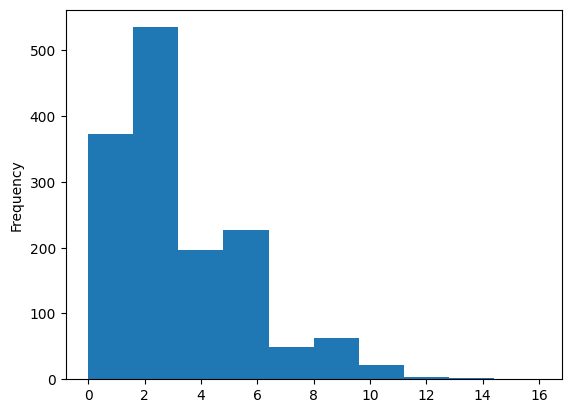

In [11]:
data['num_children'].plot(kind='hist')

<Axes: xlabel='standard_of_living_index'>

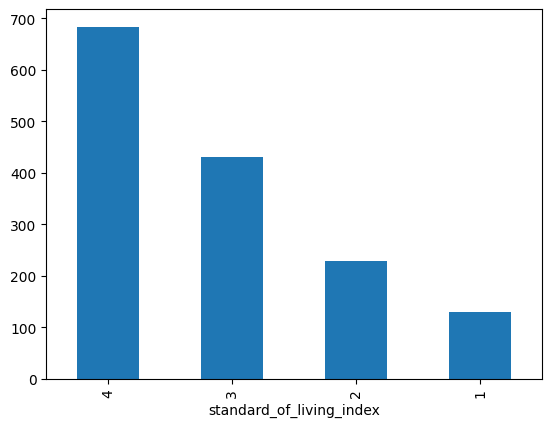

In [12]:
data.standard_of_living_index.value_counts().plot(kind='bar')

Prepared by Karol Wesolowski (148116) for Data Mining course by Mikolaj Morzy, PUT, Computer Science - Data Processing Technologies, Summer Semester 2024